### Imports

In [1]:
# Usual imports
import matplotlib.pyplot as plt               # for plotting
import numpy as np                            # matrix handling
import numpy.polynomial.hermite as Herm
import math

### Generic functions

In [2]:
def QHO_Eigenvls_true(intmin,intmax,omega):
    return omega*(np.arange(intmin,intmax,1)+.5)

def QHO_Eigenf_true(N,L,n): #Evaluates the n-th exact eigenfunction of the h.o. on the point x
    psi = []
    w = 1
    x = np.arange(0,N+1)*L/N - L/2
    
    # coefficients for Hermite series, all 0s except the n-th term
    herm_coeff = []
    for i in range(n):
        herm_coeff.append(0)
    herm_coeff.append(1)

    psi = np.exp(-w*x**2/(2)) * Herm.hermval((w)**0.5 * x, herm_coeff)
    # normalization factor for the wavefunction:
    psi = np.multiply(psi, 1 / ((2**n) * np.math.factorial(n))**0.5 * (1/(np.pi))**0.25)
    return psi 

In [3]:
def plot_eivals_LNW(L,N,W,verbose=0):
    folder = 'L'+str(L)+'-N'+str(N)+'-W'+str(W)
    
    ! echo $L $N $W $folder $verbose | ./qho
    eivals = np.genfromtxt('./'+folder+'/eigenvalues.csv', delimiter='')

    plt.plot(np.arange(1,N),QHO_Eigenvls_true(1,N,W))
    plt.plot(np.arange(0,len(eivals)),np.sort(eivals),'+',alpha=0.7,ms=2, linewidths=1)
    plt.xscale('log')
    plt.yscale('log')
    
def plot_eidiff_LNW(L,N,W,verbose=0):
    folder = 'L'+str(L)+'-N'+str(N)+'-W'+str(W)
    
    ! echo $L $N $W $folder $verbose | ./qho
    eispc = np.genfromtxt('./'+folder+'/eigenvalues.csv', delimiter='')
    
    eispc = np.sort(eispc)
    eispc = np.abs(eispc - QHO_Eigenvls_true(0,N+1,W))/QHO_Eigenvls_true(0,N+1,W)
    
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(np.arange(0,len(eispc)),eispc,'o',alpha=0.7,ms=2)
    #print(eispc[:10])

In [4]:
prettycolor = ['lime', 'yellow', 'deeppink', 'blue']

def plot_eival_Ns(L,Ns,W,verbose=0):
    for i,N in enumerate(Ns):
        folder = 'L'+str(L)+'-N'+str(N)+'-W'+str(W)
        ! echo $L $N $W $folder $verbose | ./qho
        eivals = np.genfromtxt('./'+folder+'/eigenvalues.csv', delimiter='')
    
        eivals = np.sort(eivals)
        
        plt.plot(np.arange(0,len(eivals)),np.sort(eivals),'o',alpha=0.4,ms=5,label='N='+str(N),color=prettycolor[i])
        
    plt.xscale('Log')
    plt.yscale('Log')
    plt.plot(np.arange(1,100),QHO_Eigenvls_true(1,100,W),'--',color='red',label='Theoretical')
    plt.ylim(1,1000)
    plt.xlim(1,100)
    plt.xlabel('Log(N)')
    plt.ylabel(r'Log($E_n$)')
    plt.title('L = '+str(L))
    plt.legend()
    
    plt.savefig('imgs/eigenvalue_L'+str(L)+'.svg', format='svg')
    
def plot_eidiff_Ns(L,Ns,W,verbose=0):
    for i,N in enumerate(Ns):
        folder = 'L'+str(L)+'-N'+str(N)+'-W'+str(W)
        eispc = np.genfromtxt('./'+folder+'/eigenvalues.csv', delimiter='')
    
        eispc = np.sort(eispc)
        eispc = np.abs(eispc - QHO_Eigenvls_true(0,N+1,W))/QHO_Eigenvls_true(0,N+1,W)
        
        plt.plot(np.arange(0,len(eispc)),eispc,'o',alpha=0.5,ms=3,label='N='+str(N),color=prettycolor[i])
        
    plt.xscale('Log')
    plt.yscale('Log')
    #plt.ylim(1,1000)
    #plt.xlim(1,100)
    plt.xlabel('Log(N)')
    plt.ylabel(r'Log($E_n$)')
    plt.title('L = '+str(L))
    plt.legend()
    
    plt.savefig('imgs/erreigenvalue_L'+str(L)+'.svg', format='svg')

In [19]:
def plot_wavefunction(L,N,W,n,ranx=10):
    folder = 'L'+str(L)+'-N'+str(N)+'-W'+str(W)
    
    eifu = np.genfromtxt('./'+folder+'/eigenvectors.csv', delimiter='')
    eifu = eifu[:,n+57]
    neifu = eifu/np.linalg.norm(eifu)
    plt.plot(np.arange(0,N+1)*L/N - L/2,neifu,label=r'$\psi^{{{0}}}_{{{1}}}$'.format('NUM',n))
    
    true = QHO_Eigenf_true(N,L,n)
    ntrue = true/np.linalg.norm(true)
    plt.plot(np.arange(0,N+1)*L/N - L/2,ntrue, label=r'$\psi^{{{0}}}_{{{1}}}$'.format('TH',n))
    
    plt.title('N='+str(N)+', L='+str(L))
    plt.legend(prop={'size': 12})
    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xlim(-ranx,ranx)
    plt.xlabel('x')
    plt.savefig('imgs/wave_E'+str(n)+'-'+folder+'.svg', format='svg')
    
def plot_wavefunctiondiff(L,N,W,n,ranx=10):
    folder = 'L'+str(L)+'-N'+str(N)+'-W'+str(W)
    
    eifu = np.genfromtxt('./'+folder+'/eigenvectors.csv', delimiter='')
    eifu = eifu[:,n+57]
    neifu = eifu/np.linalg.norm(eifu)
    
    true = QHO_Eigenf_true(N,L,n)
    ntrue = true/np.linalg.norm(true)
    
    plt.plot(np.arange(0,N+1)*L/N - L/2, (neifu - ntrue), color='crimson')
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    plt.title('Error: N='+str(N)+', L='+str(L))
    #plt.ylabel(r'$(\psi^{{{1}}}_{{{0}}}-\psi^{{{2}}}_{{{0}}})$'.format(n,'NUM','TH')).set_rotation(0)
    plt.xlabel('x')
    
    plt.xlim(-ranx,ranx)
    
    plt.savefig('imgs/errwave_E'+str(n)+'-'+folder+'.svg', format='svg')

# Compiling

In [6]:
! gfortran ./harmonic_oscillator.f90 -o ./qho -llapack

# Eigenvalues

In [7]:
L = 10
N = 1000
W = 1

Ns = [100,200,500,1000]

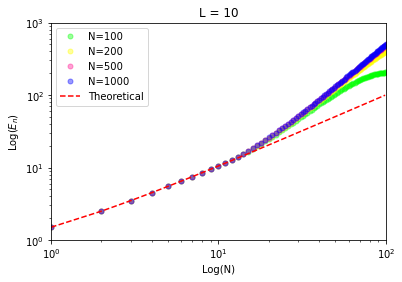

In [8]:
L = 10 
plot_eival_Ns(L,Ns,W)

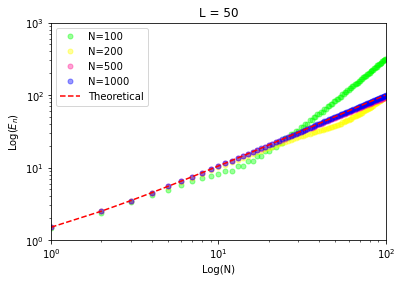

In [9]:
L = 50
plot_eival_Ns(L,Ns,W)

In [10]:
Ns = [100,200,500,1000]

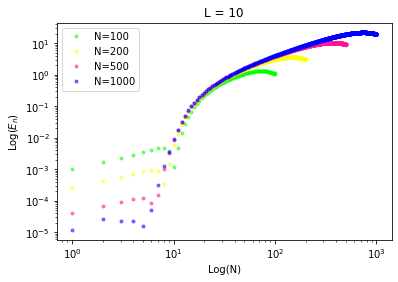

In [11]:
L = 10
plot_eidiff_Ns(L,Ns,W)

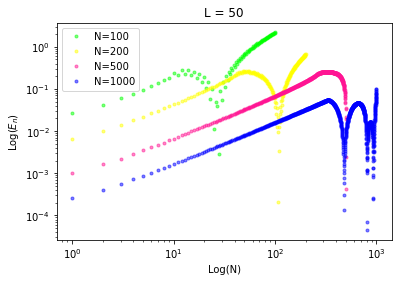

In [12]:
L = 50
plot_eidiff_Ns(L,Ns,W)

# Eigenvectors

In [13]:
L = 50
N = 500
W = 1

In [14]:
folder = 'L'+str(L)+'-N'+str(N)+'-W'+str(W)
eifu = np.genfromtxt('./'+folder+'/eigenvectors.csv', delimiter='')


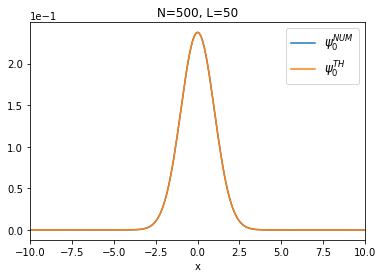

In [20]:
plot_wavefunction(L,N,W,0)

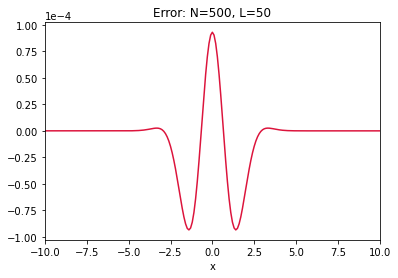

In [21]:
plot_wavefunctiondiff(L,N,W,0)

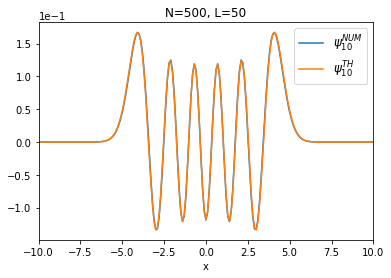

In [22]:
plot_wavefunction(L,N,W,10)

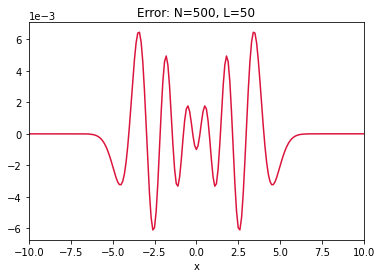

In [23]:
plot_wavefunctiondiff(L,N,W,10)